In [1]:
import os

In [2]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [3]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

as we can see that data is imbalanced too

In [4]:
len(os.listdir('COVID-19_Radiography_Dataset/Viral Pneumonia/images'))

1345

In [9]:
pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
import cv2

In [11]:
img = cv2.imread("COVID-19_Radiography_Dataset/Normal/images/Normal-10005.png")

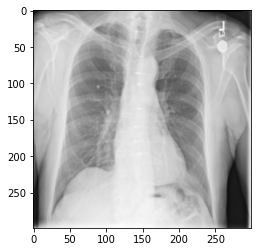

In [12]:
import matplotlib.pyplot as plt
plt.imshow(img)


In [13]:
img.shape

(299, 299, 3)

as we do not have to resize it as all images have same dimensions

## now we are splitting the data in training and testing

In [14]:
import pandas as pd

In [15]:
df = pd.read_excel("COVID-19_Radiography_Dataset/COVID.metadata.xlsx")

In [16]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


as we have declared in function we r gonna need image with the label so for that we have to provide full path with url 

In [17]:
urls = os.listdir("COVID-19_Radiography_Dataset/COVID/images")# all the names\labels of the images is stored

In [18]:
path = "COVID-19_Radiography_Dataset/COVID/images" + urls[0]# joining the path and label

In [19]:
path

'COVID-19_Radiography_Dataset/COVID/imagesCOVID-1.png'

so now this is the path we r gonna provide with name 

In [22]:
import numpy as np
def loadImages(path,urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path +"/"+ urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0 #normalizing
    #if we want to resize it incase dimensions are diff
    img = cv2.resize(img,(100,100))# we r resizing it bcoz we could get memory error as there are lots of images present
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels




In [23]:
#for covid images
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covid_urls = os.listdir(covid_path)
covid_images ,covid_targets = loadImages(covid_path,covid_urls,1)

In [24]:
#for normal images
normal_path =  "COVID-19_Radiography_Dataset/Normal/images"
normal_urls = os.listdir(normal_path)
normal_images , normal_targets = loadImages(normal_path,normal_urls,0)

now we r going to convert it in array format bcoz there are many functions which we cannot use for list so we r gonna convert it

In [25]:
import numpy as np
covid_images = np.asarray(covid_images)
normal_images = np.asarray(normal_images)

In [26]:
covid_images.shape

(3616, 100, 100, 3)

In [27]:
normal_images.shape

(10192, 100, 100, 3)

now adding the normal and covid images in one variables  

In [28]:
data = np.r_[covid_images,normal_images]

In [29]:
data.shape

(13808, 100, 100, 3)

In [30]:
targets = np.r_[covid_targets,normal_targets]

In [31]:
targets.shape

(13808,)

# performing train test split

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(data,targets,test_size = 0.25)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D,Flatten,Dense 

In [36]:
model = Sequential([
    Conv2D(32,3,input_shape = (100,100,3),activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16,3,activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation = 'relu'),
    Dense(256,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

In [38]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [39]:
model.fit(x_train,y_train,batch_size = 32,epochs = 5,validation_data = (x_test,y_test))

Epoch 1/5
324/324 [==============================] - 81s 219ms/step - loss: 0.3981 - accuracy: 0.8184 - val_loss: 0.3201 - val_accuracy: 0.8583
Epoch 2/5
324/324 [==============================] - 63s 196ms/step - loss: 0.2712 - accuracy: 0.8813 - val_loss: 0.2405 - val_accuracy: 0.8966
Epoch 3/5
324/324 [==============================] - 74s 229ms/step - loss: 0.2138 - accuracy: 0.9109 - val_loss: 0.2110 - val_accuracy: 0.9131
Epoch 4/5
324/324 [==============================] - 91s 280ms/step - loss: 0.1689 - accuracy: 0.9313 - val_loss: 0.2164 - val_accuracy: 0.9189
Epoch 5/5
324/324 [==============================] - 94s 291ms/step - loss: 0.1385 - accuracy: 0.9449 - val_loss: 0.1545 - val_accuracy: 0.9412


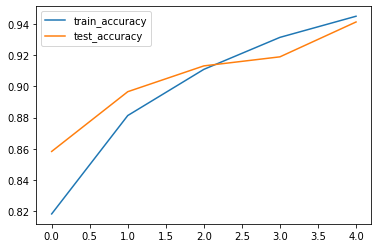

In [40]:
plt.plot(model.history.history['accuracy'],label = 'train_accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

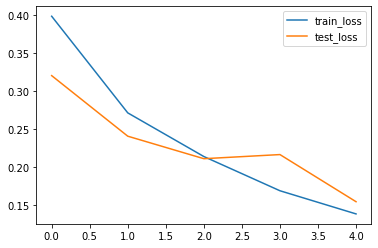

In [41]:
plt.plot(model.history.history['loss'],label = 'train_loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()